In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/high_school_sat_gpa.csv', usecols=['math_SAT','verb_SAT','high_GPA'], sep=' ')

In [3]:
data.head()

,high_GPA,math_SAT,verb_SAT
0,3.45,643,589
1,2.78,558,512
2,2.52,583,503
3,3.67,685,602
4,3.24,592,538


In [4]:
data.dtypes

high_GPA    float64
math_SAT      int64
verb_SAT      int64
dtype: object

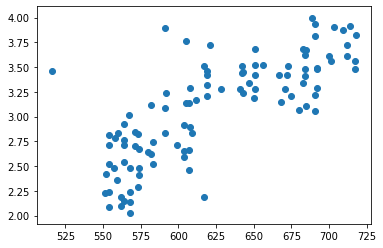

In [5]:
%matplotlib inline
plt.scatter(data['math_SAT'], data['high_GPA'])

In [6]:
data.shape

(105, 3)

# Creating and training model with math results

In [7]:
math_lr = LinearRegression()
math_lr.fit(data['math_SAT'].values.reshape(-1,1), data['high_GPA'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing model

In [8]:
math_lr.score(data['math_SAT'].values.reshape(-1,1), data['high_GPA'].values.reshape(-1,1))

0.5900426542458013

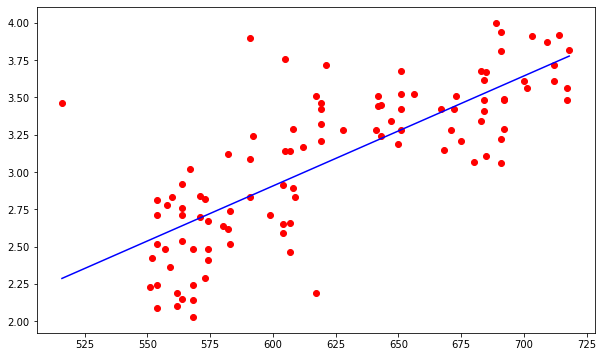

In [9]:
x_min = data['math_SAT'].min()
x_max = data['math_SAT'].max()

plt.figure(figsize=(10,6))
plt.scatter(data["math_SAT"], data["high_GPA"], color='red')
plt.plot([x_min, x_max],math_lr.predict([[x_min],[x_max]]), color='blue')
plt.show()

# Creating model with verb_SAT results

In [10]:
verb_lr = LinearRegression()
verb_lr.fit(data['verb_SAT'].values.reshape(-1,1), data['high_GPA'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
verb_lr.score(data['verb_SAT'].values.reshape(-1,1), data['high_GPA'].values.reshape(-1,1))

0.5272905942176637

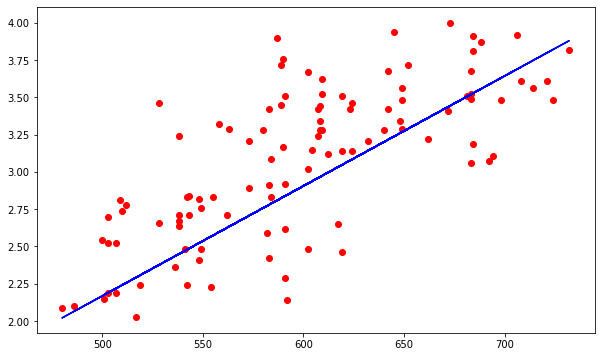

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(data["verb_SAT"], data["high_GPA"], color='red')
plt.plot(data['verb_SAT'],math_lr.predict(data['verb_SAT'].values.reshape(-1,1)), color='blue')
plt.show()

# Model with two input variables

In [13]:
lr = LinearRegression()
lr.fit(data[['math_SAT', 'verb_SAT']].values, data['high_GPA'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.score(data[['math_SAT', 'verb_SAT']].values, data['high_GPA'].values.reshape(-1,1))

0.6136965478827912

In [15]:
student = np.array([600,650]).reshape(1,2)
lr.predict(student)

array([[3.0757961]])